<a href="https://colab.research.google.com/github/AngsumanBarua/Mark_Distribution_Management/blob/main/IPLPLAYERSELECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import output
import ipywidgets as widgets
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Load the dataset
df_most_runs = pd.read_csv('/content/gdrive/My Drive/ipldataset/MostRuns2022.csv')
df_most_runs.head(10)

Mounted at /content/gdrive


,POS,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,1,KL Rahul,14,14,2,670,132*,55.83,518,129.34,1,5,58,23
1,2,Shikhar Dhawan,17,17,3,618,106*,44.14,427,144.73,2,4,67,12
2,3,David Warner,16,16,2,548,85*,39.14,407,134.64,0,4,52,14
3,4,Shreyas Iyer,17,17,2,519,88*,34.60,421,123.27,0,3,40,16
4,5,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
5,6,Quinton de Kock,16,16,2,503,78*,35.92,358,140.50,0,4,46,22
6,7,Suryakumar Yadav,16,15,3,480,79*,40.00,331,145.01,0,4,61,11
7,8,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8
8,9,Virat Kohli,15,15,4,466,90*,42.36,384,121.35,0,3,23,11
9,10,AB de Villiers,15,14,4,454,73*,45.40,286,158.74,0,5,33,23


In [ ]:
# Drop the 'POS' column
df_most_runs = df_most_runs.drop("POS", 1)

# Preprocess the 'HS' column
df_most_runs['HS'] = df_most_runs['HS'].str.replace('*', '')
df_most_runs['HS'] = df_most_runs['HS'].astype(int)

# Split the data into features (X) and target variable (y)
X = df_most_runs.drop(['Player', 'HS'], axis=1)
y = df_most_runs['HS']


<ipython-input-3-5b80fd2ca7c4>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_most_runs = df_most_runs.drop("POS", 1)
<ipython-input-3-5b80fd2ca7c4>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_most_runs['HS'] = df_most_runs['HS'].str.replace('*', '')


In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

In [ ]:
# Find the top-k most important features
k = 3
feature_importances = model.feature_importances_
top_k_features_indices = feature_importances.argsort()[-k:][::-1]
top_k_features = X.columns[top_k_features_indices]
top_k_feature_names = top_k_features.tolist()


In [ ]:
print("Top", k, "Features:", top_k_features)


Top 3 Features: Index(['Runs', 'SR', 'NO'], dtype='object')


In [ ]:
# Create input widgets
runs_needed_input = widgets.IntText(value=0, description='Runs Needed:')
balls_remaining_input = widgets.IntText(value=0, description='Balls Remaining:')

# Create a button widget
select_batsman_button = widgets.Button(description='Select Batsman')


In [ ]:
# Display the widgets
display(runs_needed_input, balls_remaining_input, select_batsman_button)


IntText(value=0, description='Runs Needed:')

IntText(value=0, description='Balls Remaining:')

Button(description='Select Batsman', style=ButtonStyle())

In [ ]:
rem_balls=25
rem_run=60
req_strike_rate=(rem_run/rem_balls)*100


filtered_data = df_most_runs[df_most_runs['SR'] > req_strike_rate]

sorted_data = filtered_data.sort_values(by=['SR', 'Avg', 'BF'], ascending=[False, False, False])

if sorted_data.empty:
  sorted_data = df_most_runs.sort_values(by=['SR', 'Avg', 'BF'], ascending=[False, False, False])
else :
  print(sorted_data)

print(sorted_data)

              Player  Mat  Inns  NO  Runs  HS    Avg   BF      SR  100  50  \
31    Kieron Pollard   16    12   7   268  60  53.60  140  191.42    0   1   
50      Jofra Archer   14    10   4   113  27  18.83   63  179.36    0   0   
29     Hardik Pandya   14    13   5   281  60  35.12  157  178.98    0   1   
83  Tushar Deshpande    5     2   1    21  20  21.00   12  175.00    0   0   
33   Ravindra Jadeja   14    11   6   232  50  46.40  135  171.85    0   1   

    4s  6s  
31  15  22  
50   5  10  
29  14  25  
83   2   1  
33  22  11  


In [ ]:
df_most_runs[(df_most_runs["50"]) > 3]



,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14
4,Ishan Kishan,14,13,4,516,99,57.33,354,145.76,0,4,36,30
5,Quinton de Kock,16,16,2,503,78,35.92,358,140.50,0,4,46,22
6,Suryakumar Yadav,16,15,3,480,79,40.00,331,145.01,0,4,61,11
7,Devdutt Padikkal,15,15,0,473,74,31.53,379,124.80,0,5,51,8
9,AB de Villiers,15,14,4,454,73,45.40,286,158.74,0,5,33,23
10,Faf du Plessis,13,13,2,449,87,40.81,319,140.75,0,4,42,14


In [ ]:
df_most_runs[(df_most_runs["4s"] > 45) & (df_most_runs["6s"] > 10)]



,Player,Mat,Inns,NO,Runs,HS,Avg,BF,SR,100,50,4s,6s
0,KL Rahul,14,14,2,670,132,55.83,518,129.34,1,5,58,23
1,Shikhar Dhawan,17,17,3,618,106,44.14,427,144.73,2,4,67,12
2,David Warner,16,16,2,548,85,39.14,407,134.64,0,4,52,14
5,Quinton de Kock,16,16,2,503,78,35.92,358,140.50,0,4,46,22
6,Suryakumar Yadav,16,15,3,480,79,40.00,331,145.01,0,4,61,11


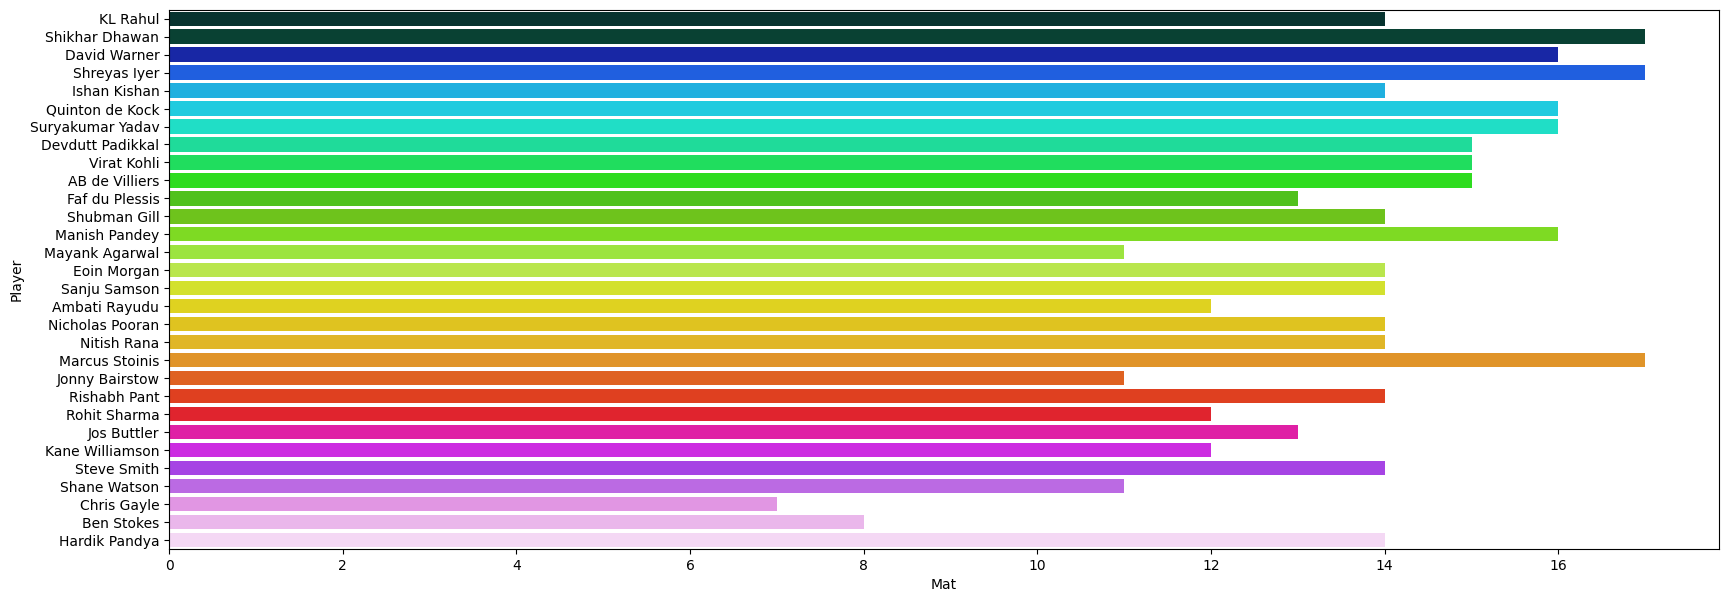

In [ ]:
df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Mat'], ascending = False)
plt.figure(figsize = (20, 7))
sns.barplot(x = df_most_runs["Mat"], y = df_most_runs["Player"][:30], palette = "gist_ncar");



In [ ]:
df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['Runs'],
                                                        ascending = False)


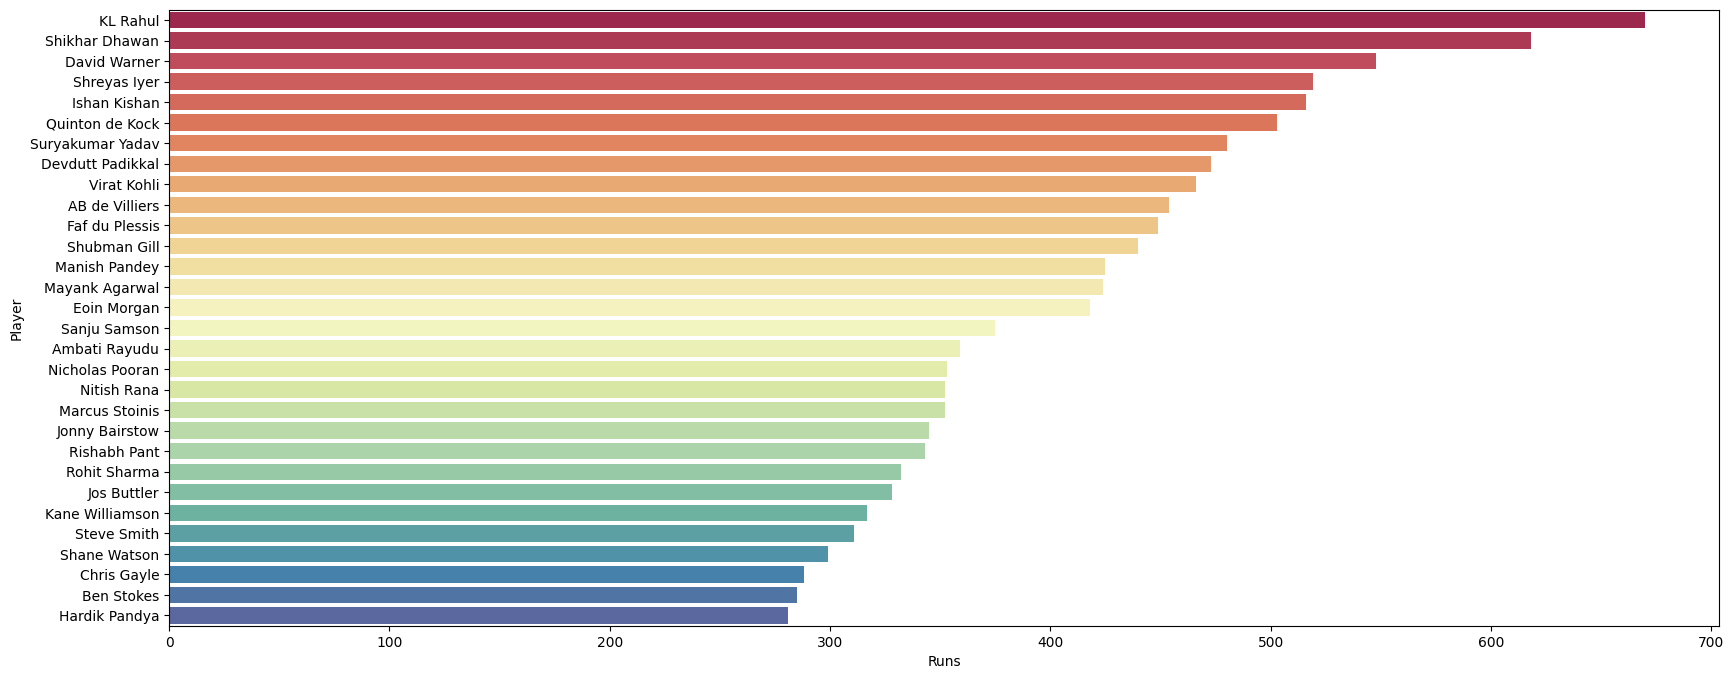

In [ ]:
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs["Runs"],
            y = df_most_runs["Player"][:30],
            palette = "Spectral");



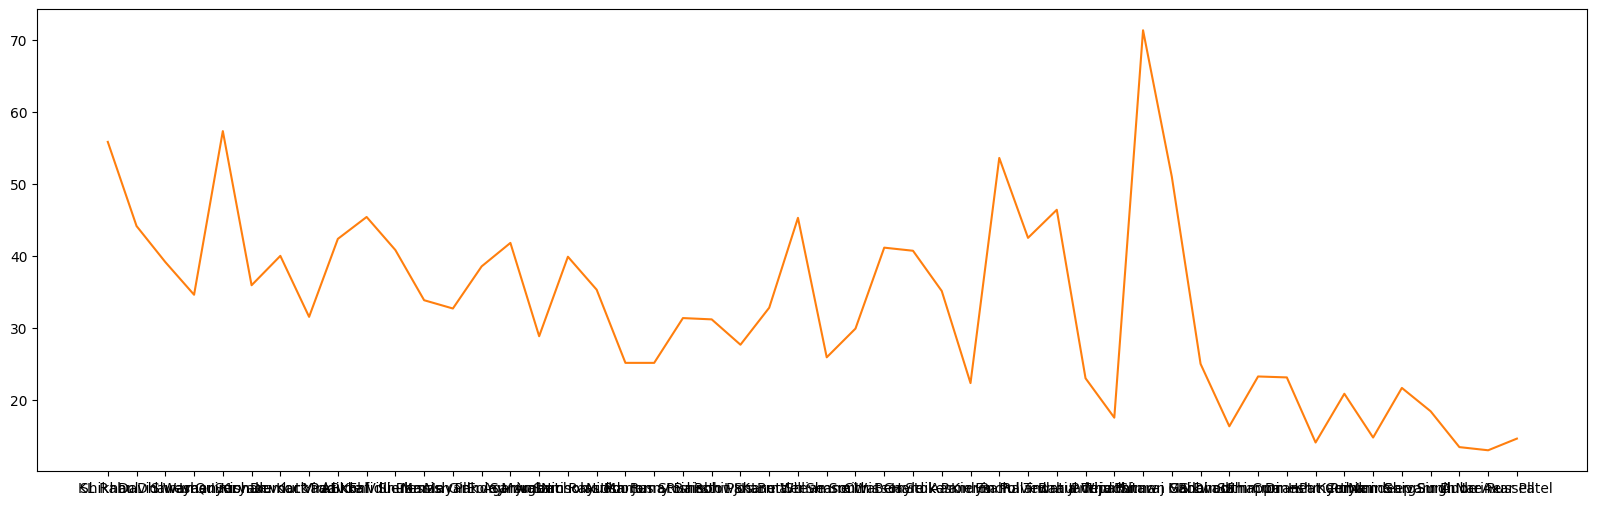

In [ ]:
plt.figure(figsize = (20, 6))
plt.plot(df_most_runs["Player"][:50],
         df_most_runs["Avg"][:50],
         color = 'tab:orange')


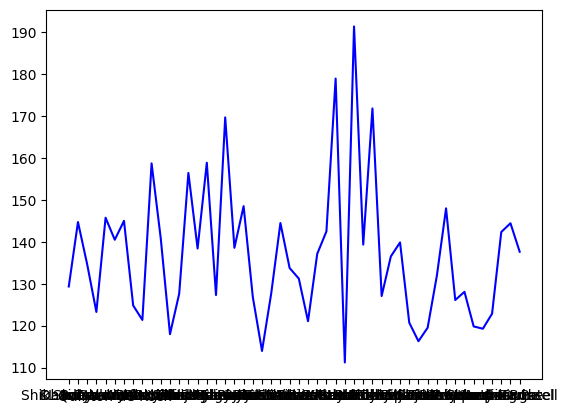

In [ ]:
plt.plot(df_most_runs["Player"][:50],
         df_most_runs["SR"][:50],
         color = 'b')


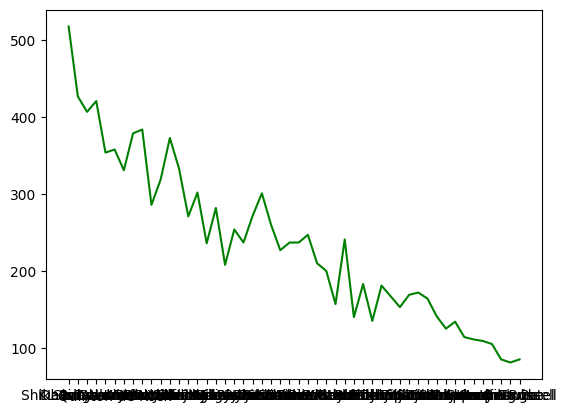

In [ ]:
plt.plot(df_most_runs["Player"][:50],
         df_most_runs["BF"][:50],
         color = 'g')



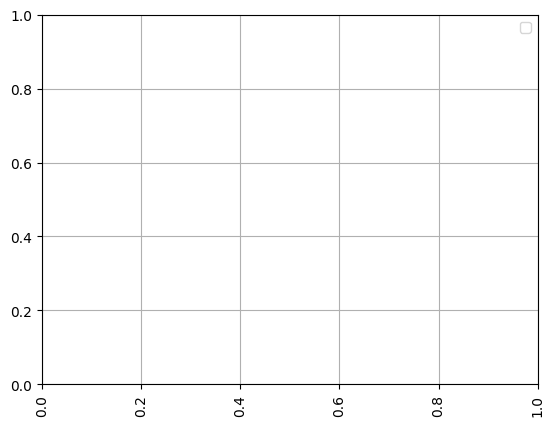

In [ ]:
plt.legend(["Average", "Strike Rate", "Balls Faced"], loc ="upper right")
plt.grid()
plt.xticks(rotation = 90)
plt.show()


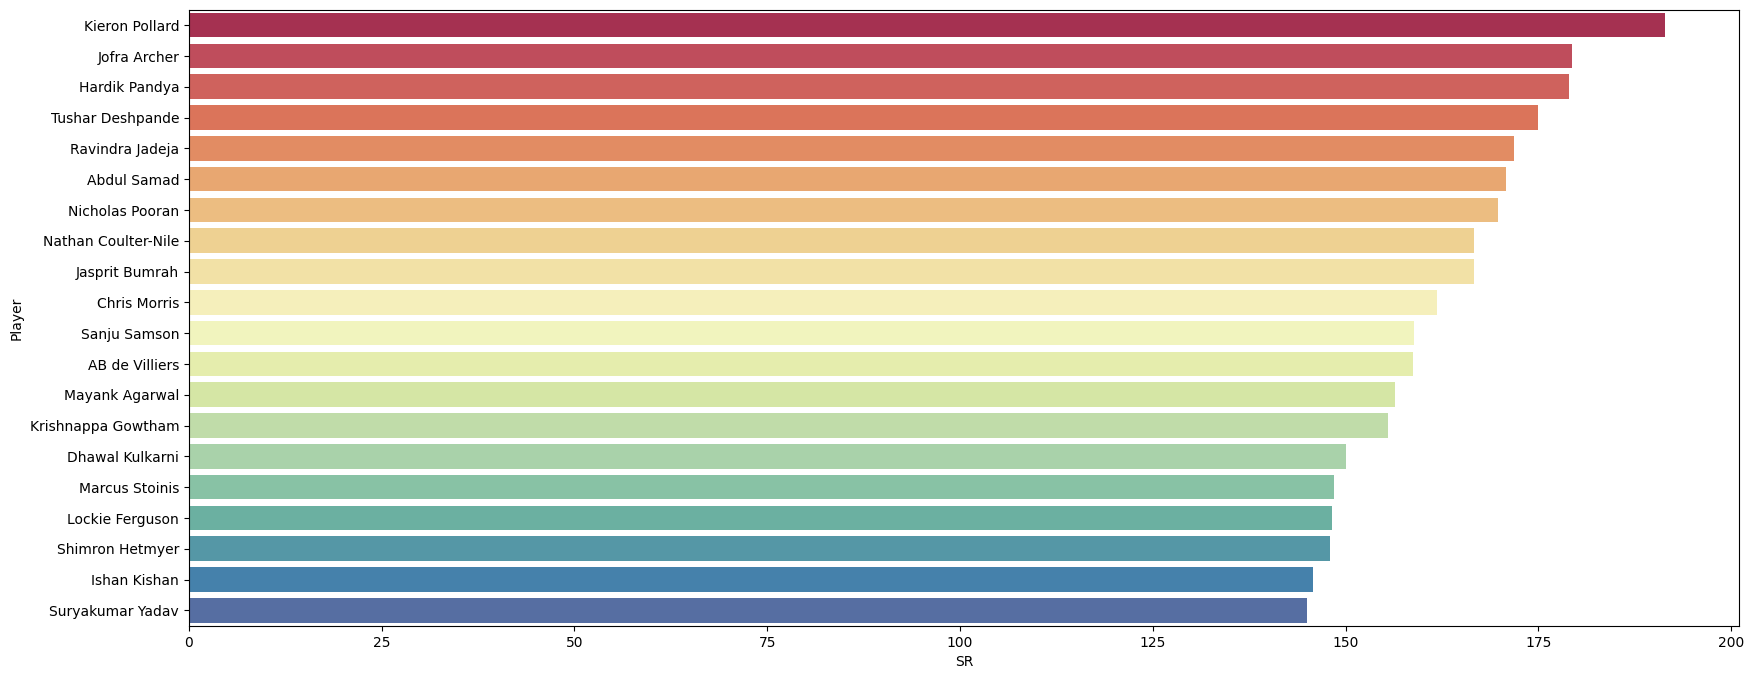

In [ ]:
df_most_runs_SR = df_most_runs.loc[:, ["Player", "SR"]]
df_most_runs_SR = df_most_runs_SR.sort_values(by = ['SR'], ascending = False)

df_most_runs_sort_by_matches = df_most_runs.sort_values(by = ['SR'], ascending = False)
acc=0.86728728191191
plt.figure(figsize = (20, 8))
sns.barplot(x = df_most_runs_SR["SR"], y = df_most_runs_SR["Player"][:20], palette = "Spectral");


In [ ]:
#highest 6s
df_most_runs_6s = df_most_runs.loc[:, ["Player", "6s"]]
df_most_runs_6s = df_most_runs_6s.sort_values(by = ['6s'], ascending = False)



In [ ]:
#highest 4s
df_most_runs_4s = df_most_runs.loc[:, ["Player", "4s"]]
df_most_runs_4s = df_most_runs_4s.sort_values(by = ['4s'], ascending = False)


In [ ]:
# Step 5: Evaluate the model
y_pred = model.predict(X_test)

In [ ]:
# Calculate accuracy
ac = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.86728728191191
